In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
GDB_DATA_PATH = './data/gdp_per_capita.csv'
OECD_DATA_PATH = './data/oecd_bli_2015.csv'

In [3]:
pd_gdb = pd.read_csv(GDB_DATA_PATH, thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")
pd_gdb.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [4]:
pd_gdb.rename(columns={"2015": "GDP per capita"}, inplace=True)
pd_gdb.set_index("Country", inplace=True)
pd_gdb.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [5]:
pd_oecd = pd.read_csv(OECD_DATA_PATH, thousands=',')
pd_oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [6]:
pd_oecd = pd_oecd.loc[pd_oecd["INEQUALITY"]=="TOT"]
pd_oecd = pd_oecd.pivot(index="Country", columns="Indicator", values="Value")
pd_oecd.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [7]:
df_full = pd.merge(left=pd_oecd, right=pd_gdb, left_index=True, right_index=True)
df_full.sort_values(by="GDP per capita", inplace=True)
keep_indices = list(set(range(36)) - {0, 1, 6, 8, 33, 34, 35})
df_full = df_full[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
df_full.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


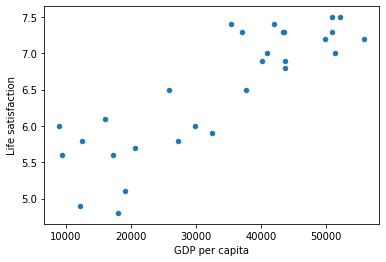

In [8]:
df_full.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [9]:
X = np.array(df_full["GDP per capita"])
y = np.array(df_full["Life satisfaction"])

In [10]:
X = np.c_[df_full["GDP per capita"]]
y = np.c_[df_full["Life satisfaction"]]
print("X.shape = {}, y.shape = {}".format(X.shape, y.shape) )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

X.shape = (29, 1), y.shape = (29, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_hat = model.predict(X_test)
print("y_hat = {}".format(y_hat))

y_hat = [[7.47675109]
 [6.83926637]
 [6.43465982]
 [7.03379257]
 [5.81068502]
 [6.08315763]
 [7.03131553]
 [5.19071827]]


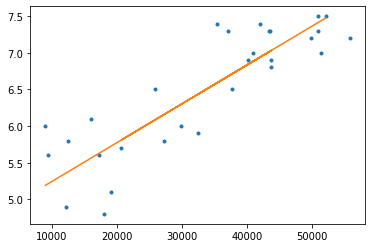

In [12]:
plt.figure()
plt.plot(X, y, '.')
plt.plot(X_test, y_hat)
plt.show()